# Random Forests
<br>
### Wisdom of the Crowds
<br>
#### Cary Goltermann

# Objectives

* Intro to Ensembles
* Review Decision Trees
* Bootstrap Aggregating
* Out of Bag (OOB) Error
* Random Forests

# Intro to Ensembles

Ensembling: building a prediction model by combining the strength of a collection of more simple base models.

Can be broken down into two basic steps:
1. Training a set of base learners
2. Combine the base learners into a composite model

# Steps for Committee Ensemble

1. Train many base models separate from one another
2. The composite model is made by allowing each of the base models to vote on the prediction, the average of these votes is taken as the ensemble's prediction

# Decision Trees

A frequent choice for the base learner in ensembles, lets recall what they look visually.

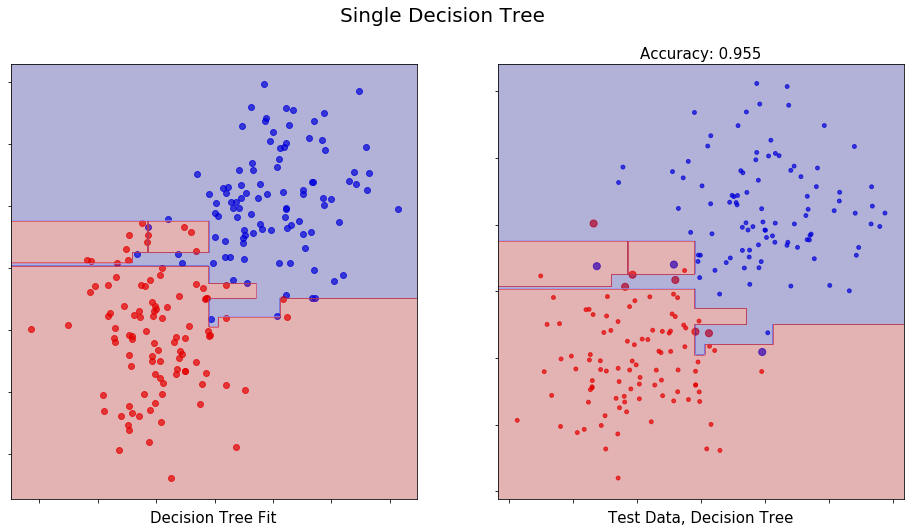

In [1]:
from random_forest_viz import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

X, y = make_data(n_points=100, state=3)
X_test, y_test = make_data(n_points=100, state=5)
plot_one_tree(X, y, X_test, y_test)

# Decision Tree Review
<br>

## Individual Questions (2 mins)

1. How are splits in a decision tree decided?
2. Are decision trees a high/low bias or high/low variance?
3. How can we control the bias/variance in a decision tree?

## Discuss answers in pairs (3 mins)

#### Answers

1. Choosing the split that minimizes Gini/Entropy -> Information Gain for classification and MSE -> Information Gain for regression.
2. They can be either high bias - low variance or low bias - high variance depending on how deep you grow them.
3. We prune them, either
    * pre: decide hyperparameters like min leaf size or max depth, or
    * post: assign a penality for adding a new node and find the optimal number of nodes with cross validation.


# Committee Ensembling Decision Trees

Following the steps of committee ensembling, to make an ensemble of trees we:
1. Train many decision trees separate from each other
2. To predict we make a prediction with each of the above models and then take the average of that as our ensemble prediction

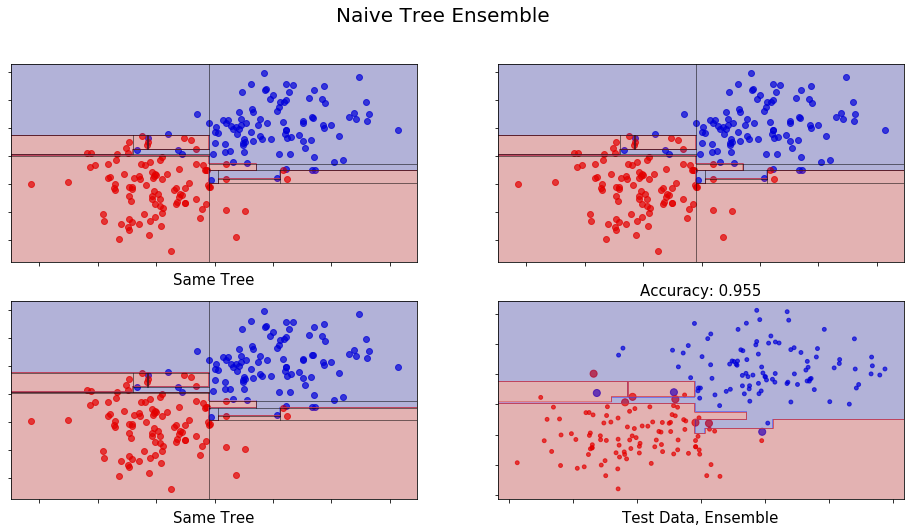

In [2]:
plot_naive_tree_ensemble(X, y, X_test, y_test)

<center>What do you notice about the decision boundary for the ensemble?</center>

# Naive Ensemble: FAIL!

The decision boundary for the ensemble is exactly the same as that of a single tree in the ensemble!

What are we to do then?

## Pair Question (2 mins)

What could we do to our trees/data to make it so that we don't get the same for each one in the ensemble?

#### Answer

We could sample from our data for each tree we build. What sampling method should we use?? How about bootstrapping?!

# Bootstrap Review
<br>

## Individual Questions
1. Describe the process of bootstrapping in your own words?
2. Describe what the bootstrap is used for?

## Discuss answers in pairs (2 mins)

#### Answers

1. Randomly sample with replacement from the training sample a new sample with the same size as the true sample.
2. Create a distrubution of point estimates, each created from a single bootstrapped sample, with this distribution we can create confidence bounds on the point estimates.

<h1><span style="color:blue">B</span>ootstrap <span style="color:blue">Agg</span>rat<span style="color:blue">ing</span>: Bagging</h1>

Previously we used the bootstrap to assess the accuracy of a parameter estimate:
* the population mean from which we drew a data sample
* the coefficients in linear regression (similar population -> sample relationship)

<br>

#### Now we describe a way to use the bootstrap to improve a prediction!

# Bagged Decision Trees

Following the steps of committee ensembling, now adding the bootstrap to the mix, to make an ensemble of trees we:
1. Train many decision trees separate from each other each by this process:  
      1\. Take a bootstrap sample of your training data  
      2\. Train a single decision tree to the bootstrap sample
2. To predict we make a prediction with each of the above models and then take the average of that as our ensemble prediction

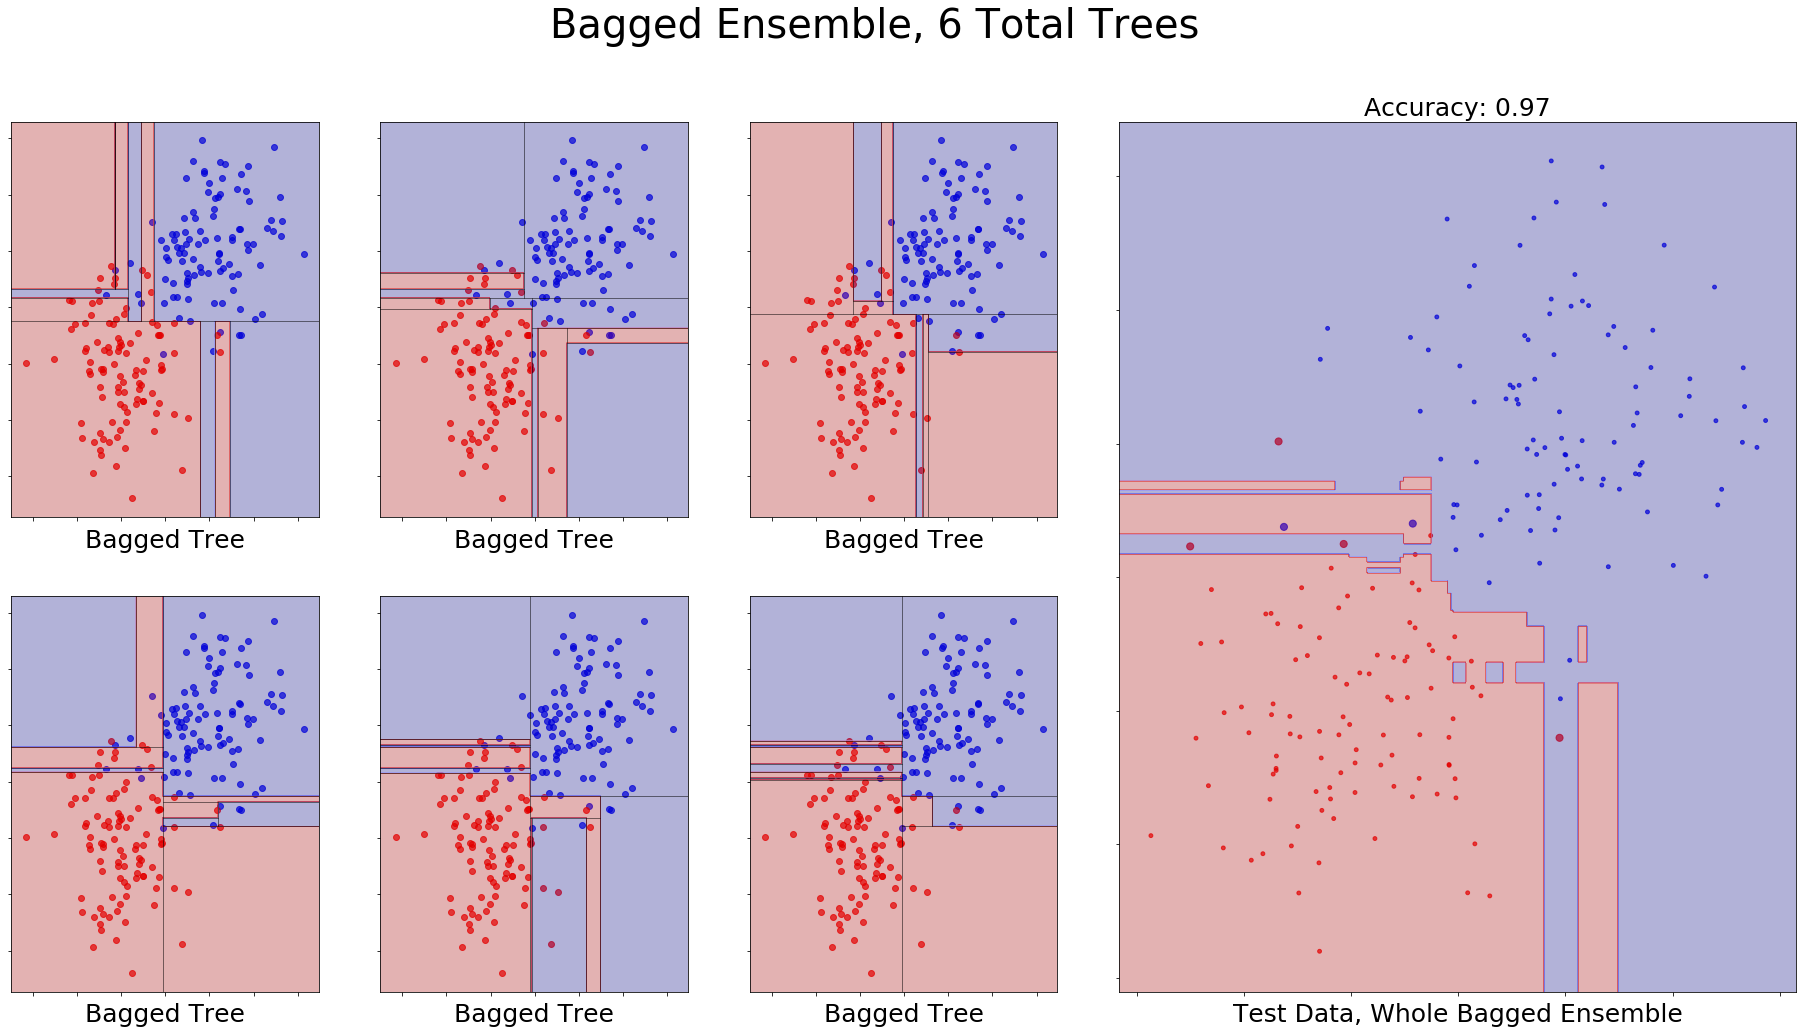

In [3]:
plot_tree_ensemble(X, y, X_test, y_test, only_bagging=True)

# Why Bagging Works

* Let $\hat{f}^{(j)}(x_0)$ be the $j^{th}$ predictor of outcome $f(x_0)$ constructed from a training set with features $x^{(j)}$ and targets $y^{(j)}$.
* If each $\hat{f}^{(j)}(x_0)$ is an unbiased predictor of $f(x_0)$ then:
    $$ E\bigg[ \frac1m \sum_{j=0}^m \hat{f}^{(j)}(x_0) \bigg]  = f(x_0), $$
or in english, the expectation of the average of unbiased predictors of a function is the true function.

<br>

#### What kind of unbiased models do we have??

#### Answer

Deeply grown trees.

# Variance Averaging

* Let $\hat{f}^{(j)}(x_0)$ be as above, then:
    $$ \text{if } Var\bigg[ \hat{f}^{(j)}(x_0) \bigg] = \sigma^2 \implies Var\bigg[ \sum_{j=0}^m \frac1m \hat{f}^{(j)}(x_0) \bigg] = \frac{\sigma^2}m $$
* So even if $\hat{f}^{(j)}(x_0)$ is a high variance predictor, the variance of the <span style="color:blue">averaged</span> predictor $\frac1m \sum_{j=0}^m \hat{f}^{(j)}(x_0)$ decreases with $m$.

# Tree Bagging
* Therefore, bagging is simply predicting $f(x_0)$ with $\frac1m \sum_{j=0}^m \hat{f}^{(j)}(x_0)$, <span style="color:blue">an average of predictors made from bootstrapped samples</span> where:
    * $(x^{(j)}, y^{(j)})$ is the $j^{th}$ bootstrapped sample, and 
    * $\hat{f}^{(j)}(x_0)$ is the $j{th}$ model fit to its corresponding bootstrapped sample.
* Bootstrapped trees provide unbiased, high variance predictors.
* Averaged, ensembled, models are lower variance than single predictors inaddition to maintaining the bias of a single tree, 0, a.k.a. The ensemble is unbiased.

# Bagging Intuition

The process of bagging:
* explores the "data set"/"feature" space, then uses average to predict what we might see under different sampling
* grows trees that each have a slightly different view of the data and then averages together their collective understanding of the data

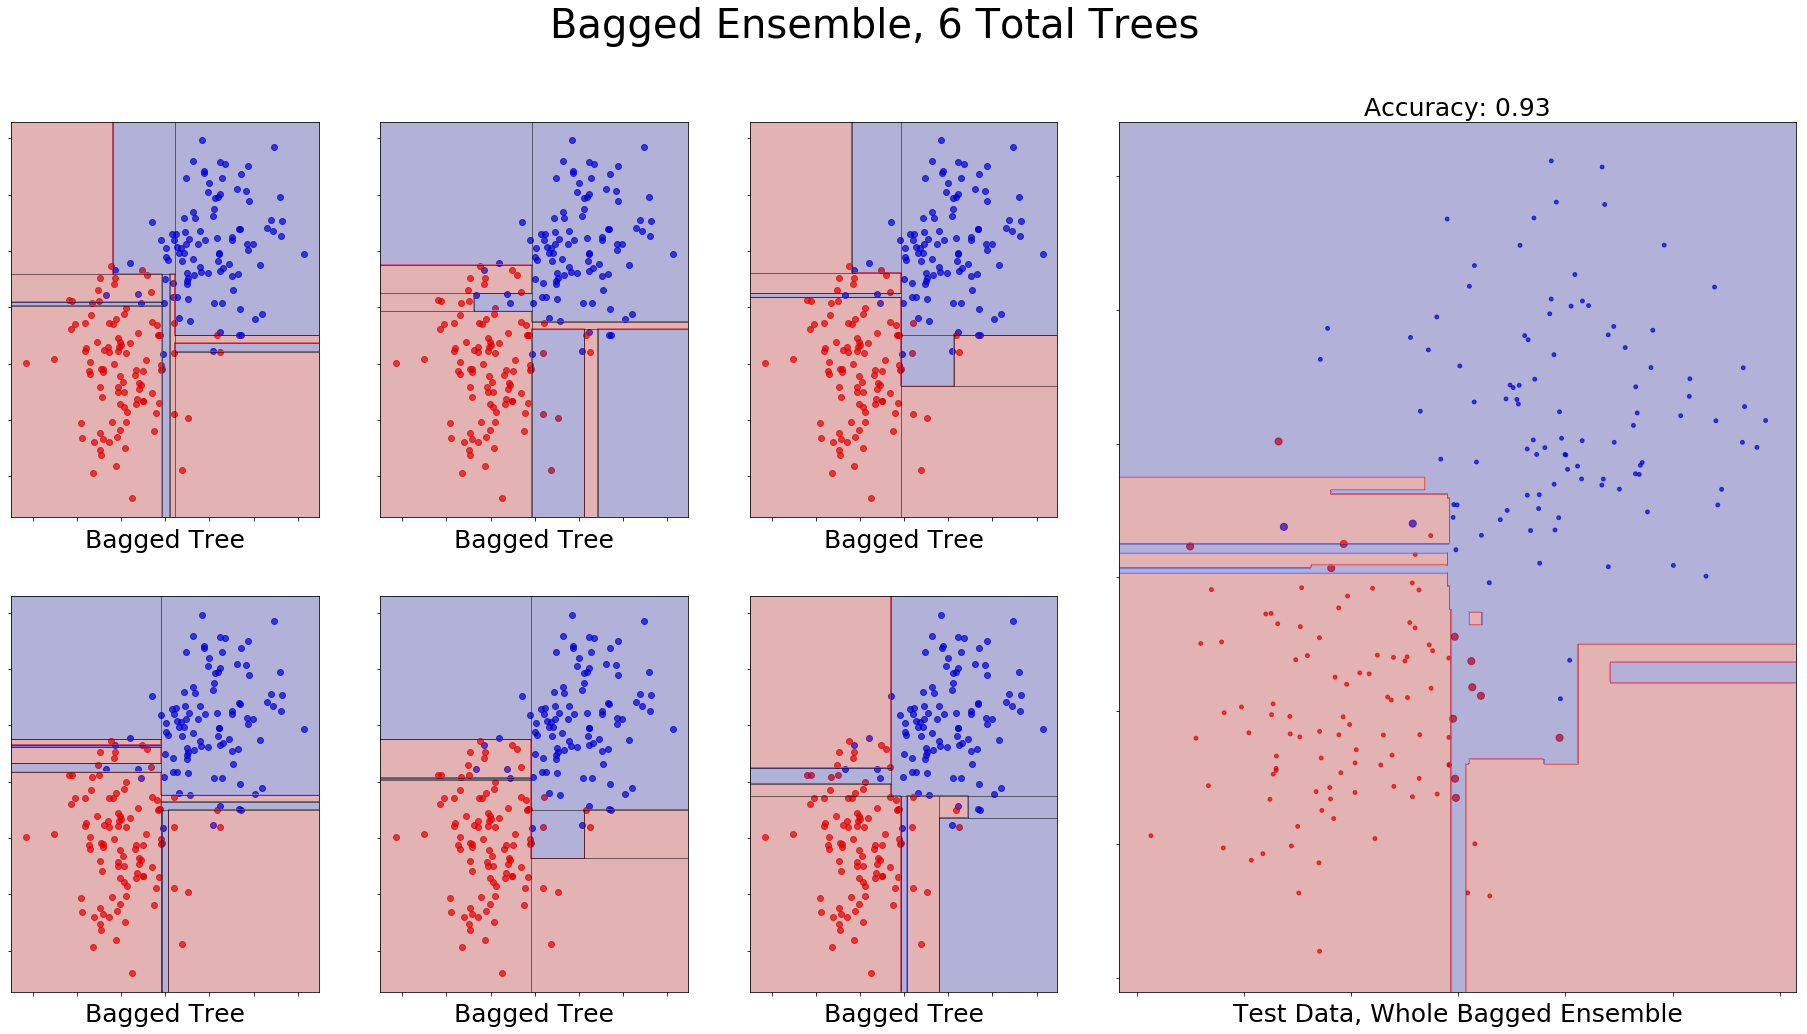

In [4]:
plot_tree_ensemble(X, y, X_test, y_test, only_bagging=True)

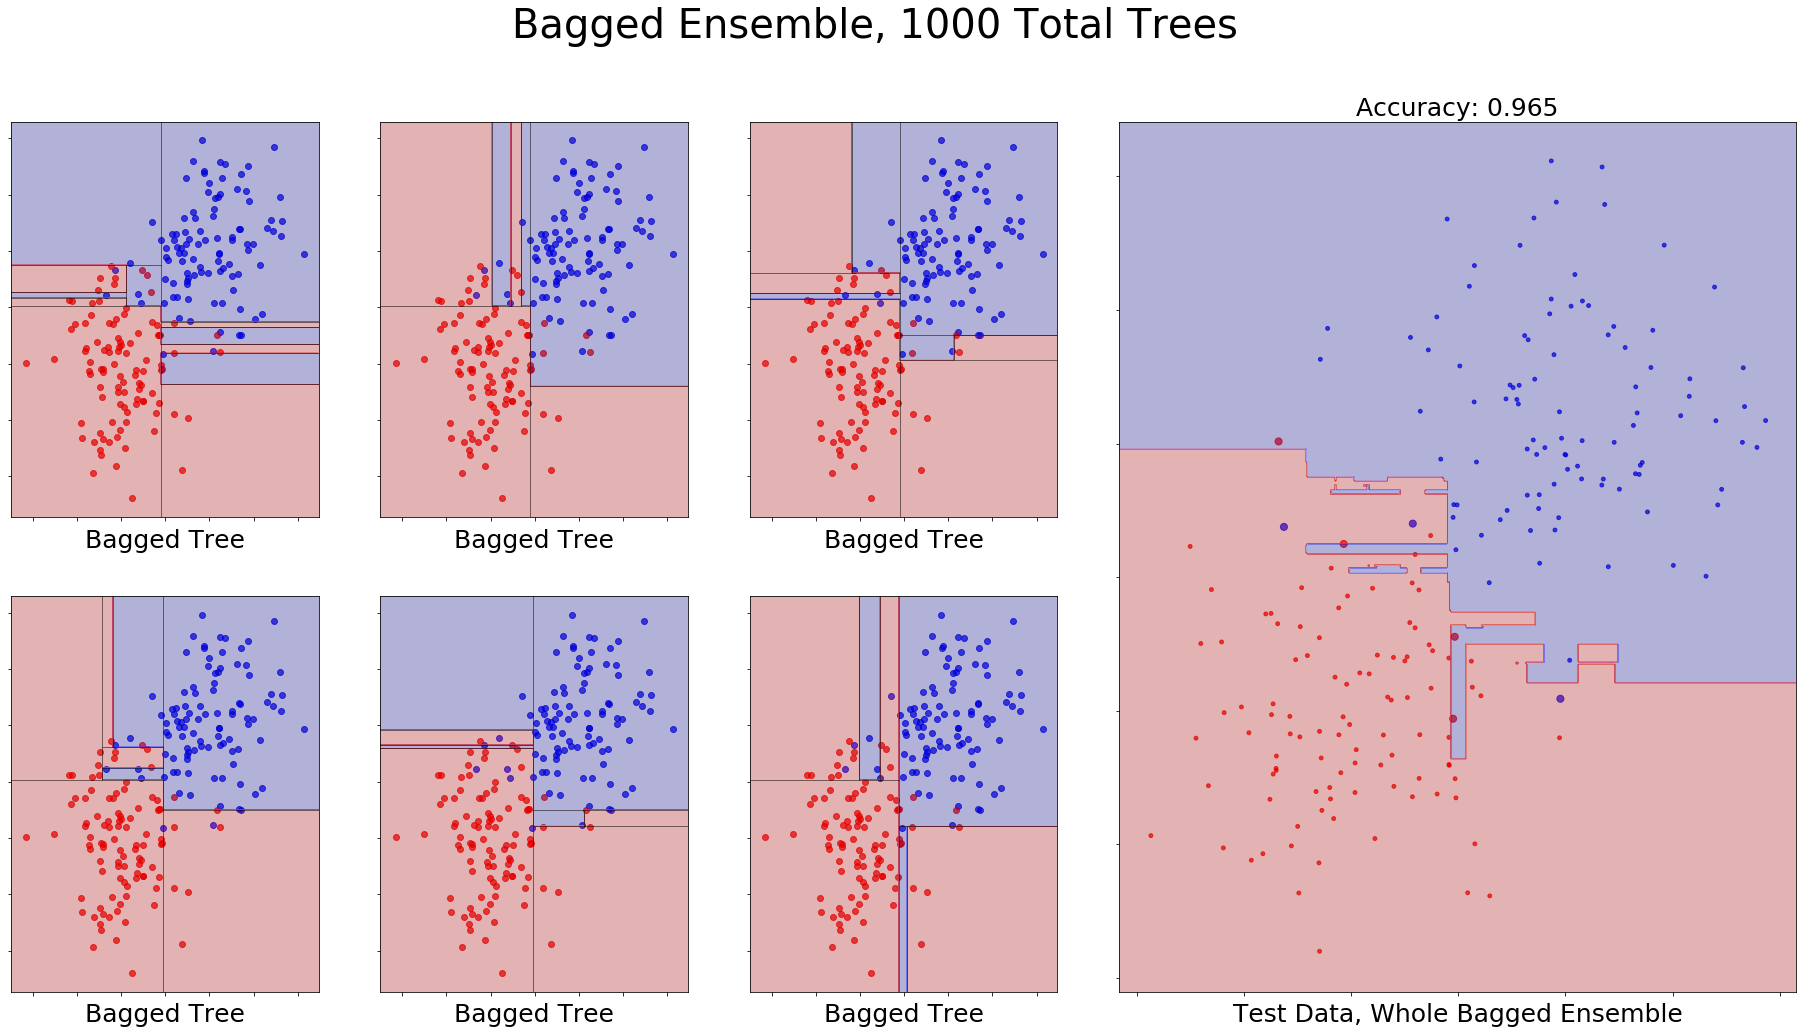

In [5]:
plot_tree_ensemble(X, y, X_test, y_test, only_bagging=True, n_estimators=1000, n_jobs=-1)

# Out of Bag (OOB) Error

There is an interesting aspect of using the bootstrap that we can exploit to estimate the test error for our bagged in the following way:
* Take a bootstrapped sample from the training data
* While we use the above sample to train a decision tree, we can use the data points that we're selected in the bootstrap process to estimate test error for the tree that was just built
* On average, bootstrapping leaves out ~$\frac13$ of the samples (really it's $1 - \frac{1}{e}$)

# Something Wicked this Way Comes

$$ Var\bigg[ \sum_{j=0}^m \frac1m \hat{f}^{(j)}(x_0) \bigg] \ne \frac{\sigma^2}m !!!$$

#### What is it actually then?

$$ \begin{align}
        Cov[X + Y] &= Var[X] + Var[Y] + \color{red}{2*Cov[X, Y]} \\
        Var\big[\hat{f}^{(j)}(x_0) + \hat{f}^{(k)}(x_0)\big] &= Var\big[\hat{f}^{(j)}(x_0)\big] +
                                                                Var\big[\hat{f}^{(k)}(x_0)\big]\; + \\ 
                                                             & \qquad \color{red}{2*Cov\big[\hat{f}^{(j)}(x_0),
                                                                                     \hat{f}^{(k)}(x_0)\big]}
   \end{align}$$

# Are Our Trees Correlated??

Well...
* $\hat{f}^{(j)}(x_0)$ is fit on $(x^{(j)}, y^{(j)})$
* $\hat{f}^{(k)}(x_0)$ is fit on $(x^{(k)}, y^{(k)})$

* $x^{(j)}, x^{(k)}$ are both bootstrapped from *the same* $\textbf{X}$ sample
* $y^{(j)}, y^{(k)}$ are both bootstrapped from *the same* $\textbf{y}$ sample

* They are very similar samples, they certainly overlap, and therefore
* we expect $\hat{f}^{(j)}(x_0)$ and $\hat{f}^{(y)}(x_0)$ to be correlated!

# How Good is Bagging Then?

If we say: $Cov[\hat{f}^{(j)}(x_0), \hat{f}^{(k)}(x_0)] = \rho, $ then:

<br>
    $$ Var\bigg[ \sum_{j=0}^m \frac1m \hat{f}^{(j)}(x_0) \bigg] = \rho \sigma^2 + (1-\rho)\frac{\sigma^2}m $$

So only the uncorrelated parts of the trees get the benefit of averaging variance.

# Random Forests
<br>
### And the Quest to Get Zero Tree Correlation

* Like bagging, random forests use the bootstrap to average away some of the variance in our high variance low bias models.
* But, they go one step beyond the bootstrap to help decorrelate our base models, make $\rho$ smaller.

# Let's Put the Random In Random Forests

* The extra decorrelation between the trees of a random forest is achieved by exploiting an intriguing quality of the trees: that their "parameters" are the splits that individually only need knowledge of a single feature at a time.
* To take advantage of this property of trees, **each split** in **each tree** of a random forest only see's a subset of the features when it's making it's split.

# Random Forest Decision Trees

Following the steps of bootstrap committee ensembling, now adding the random feature selection to the mix, to make an ensemble of trees we:
1. Train many decision trees separate from each other each by this process:  
      1\. Take a bootstrap sample of your training data  
      2\. Train a single decision tree to the bootstrap sample by the regular process except that: **at each node** only consider a **subset of features** to split on.
2. To predict we make a prediction with each of the above models and then take the average of that as our ensemble prediction

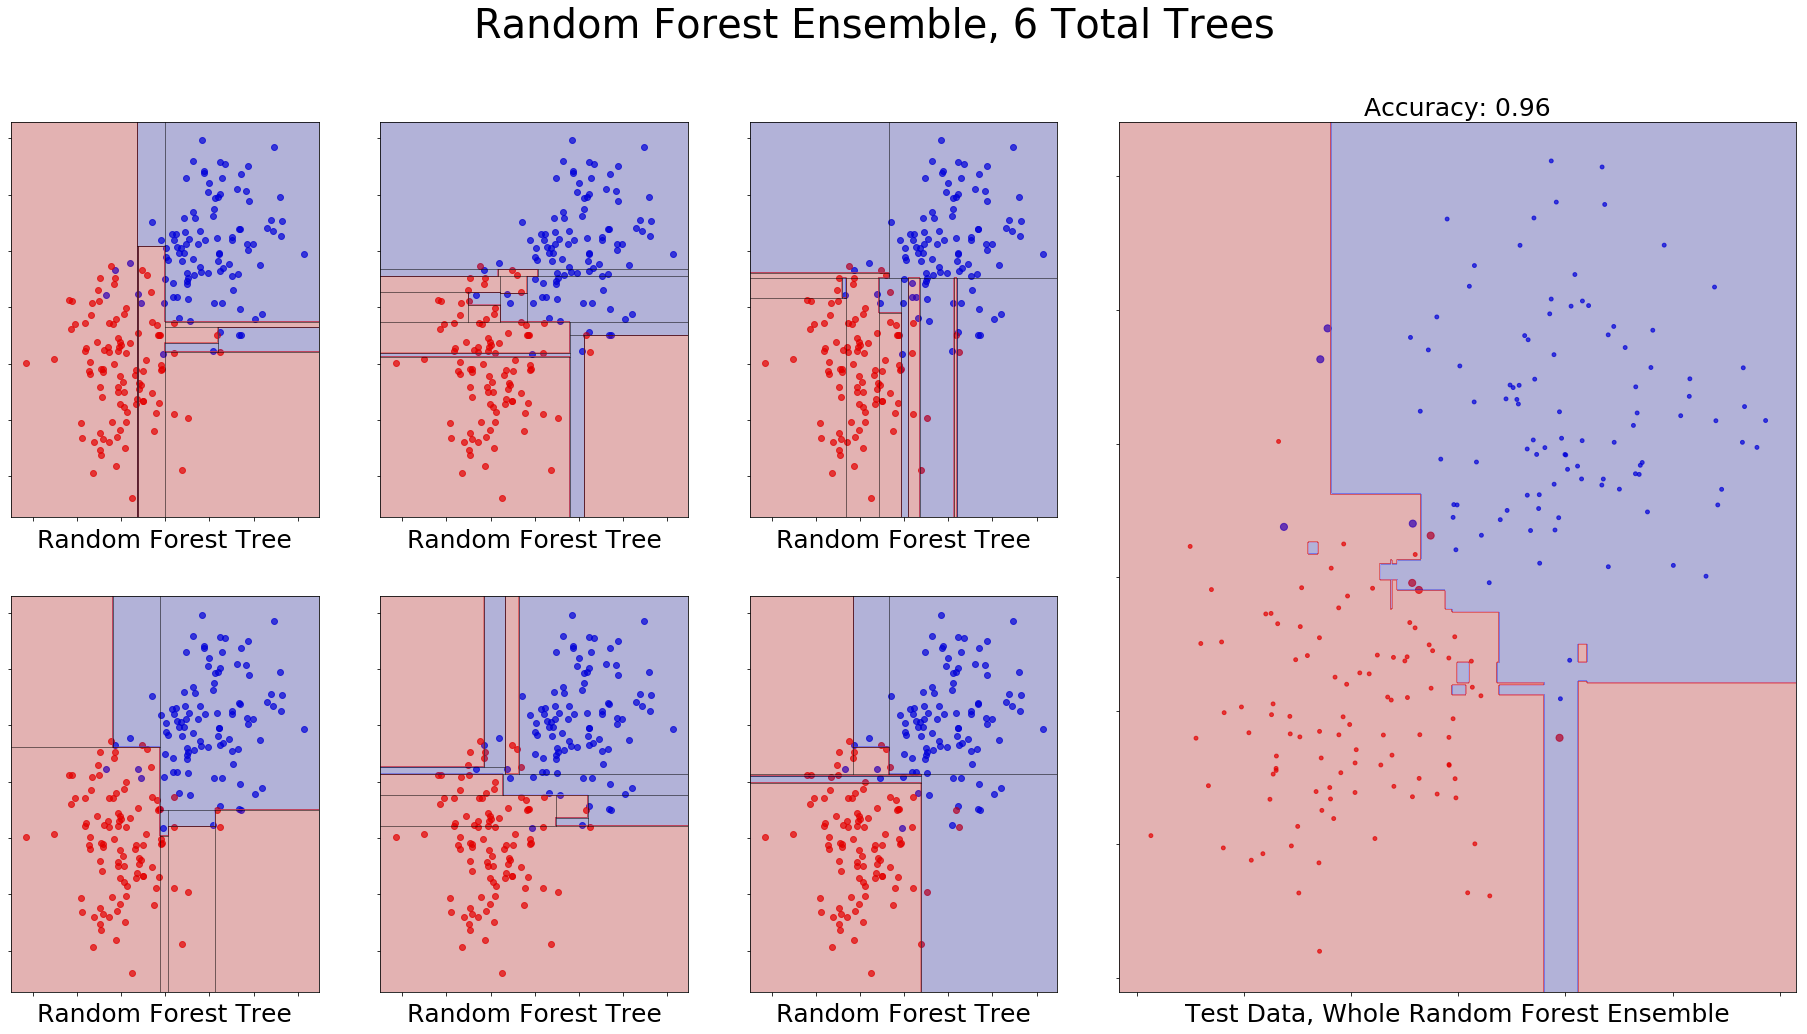

In [6]:
plot_tree_ensemble(X, y, X_test, y_test)

# Random Forest Intuition

Beyond bagging, the process of random feature selection:
* forces trees to split on features with might not be the "**best**";
* this quality, in aggregate, allows the ensemble to find a more generalizable trend in the data.

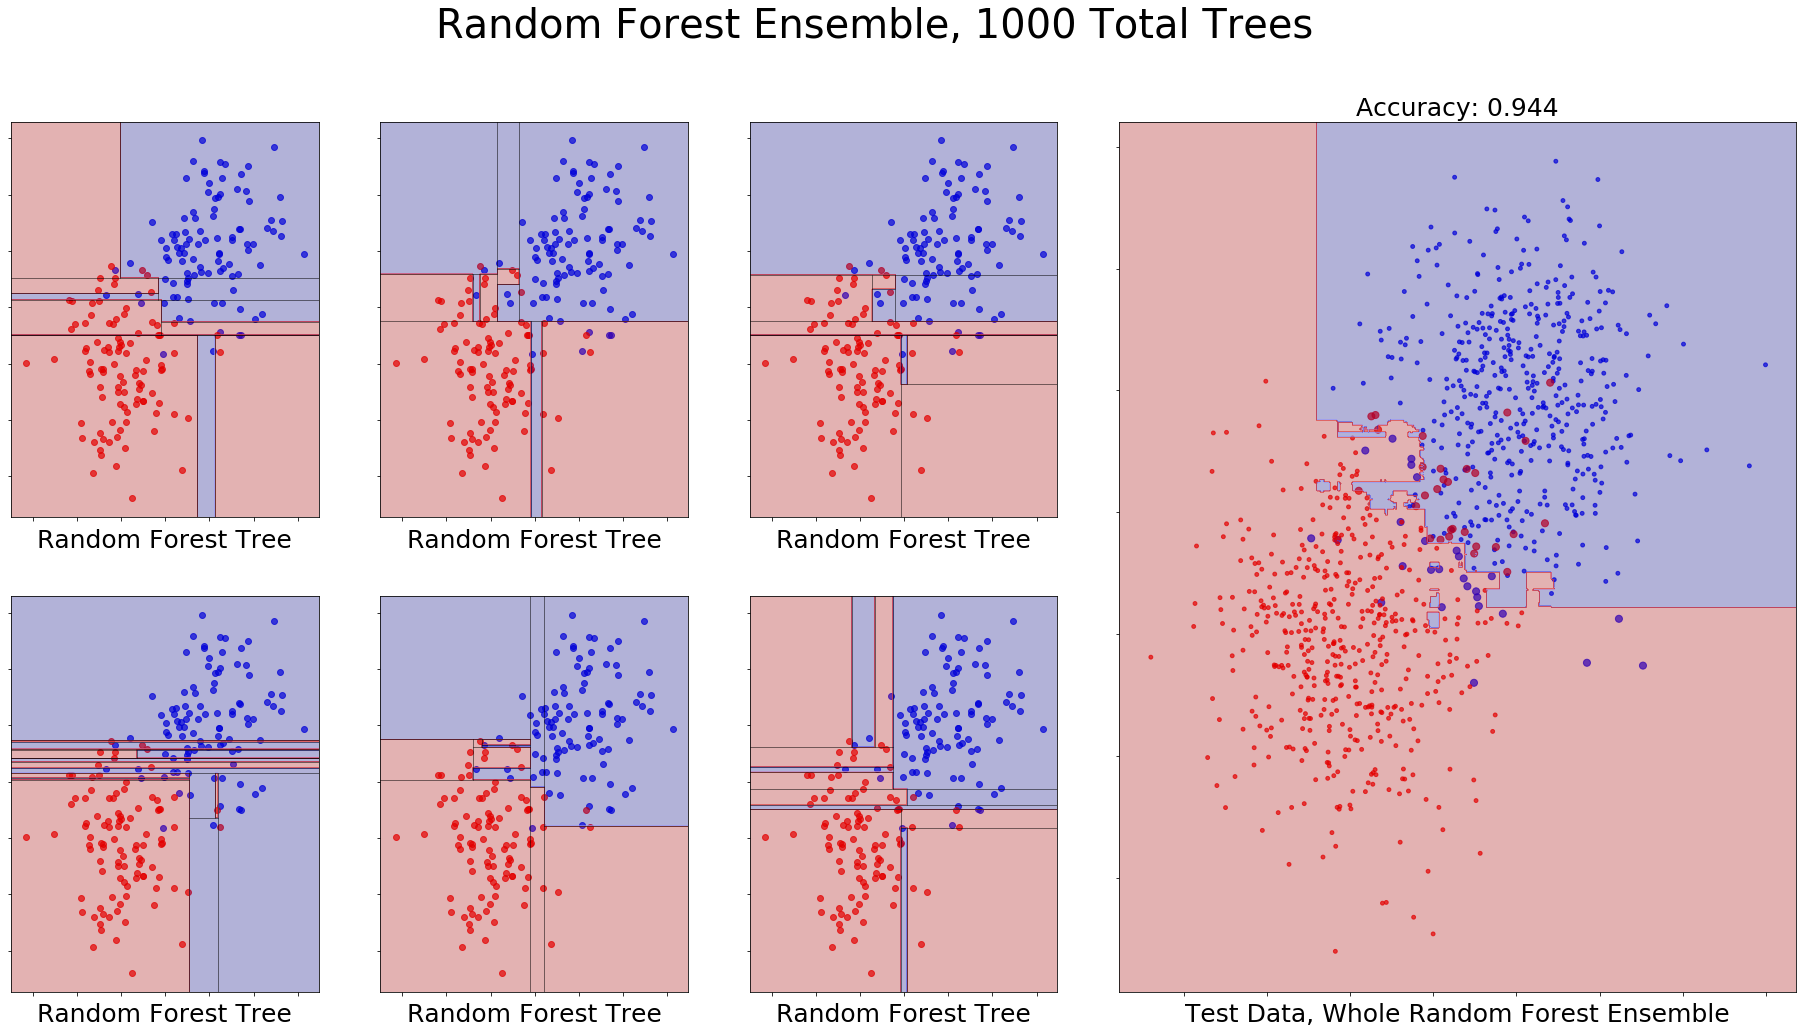

In [7]:
X_test_large, y_test_large = make_data(n_points=500, state=7)
plot_tree_ensemble(X, y, X_test_large, y_test_large, n_estimators=1000, n_jobs=-1)

# Is that Our Best Model?

* Maybe, we see above that the our random forest model with 1000 trees doesn't misclassify many of our points.
* But you may notice that most of the misclassified points are very near the boundary
* Knowing that the training and testing are generated from two separate 2D gaussian distributions centered around different points, what do you think the best model for these data would be?

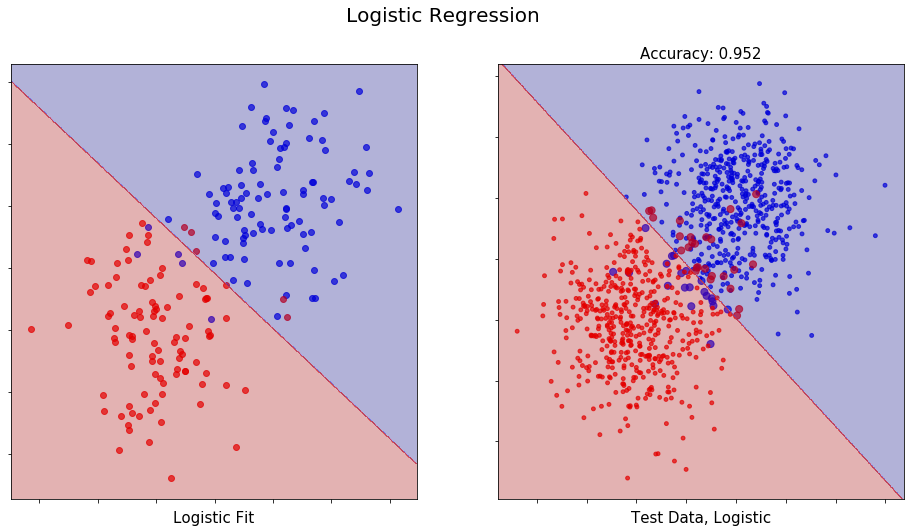

In [8]:
plot_logistic(X, y, X_test_large, y_test_large)

# Why Did Logistic Regression Do So Well?

* Didn't have much training data, so it was overfitting to the points at the boundary.
* In gerneral, the random forest still had more variance than we want.

### What's one way we could make the model less variant?

* Get more training data!
* This might not be feasible, but let's take a look at what happens if we had it.

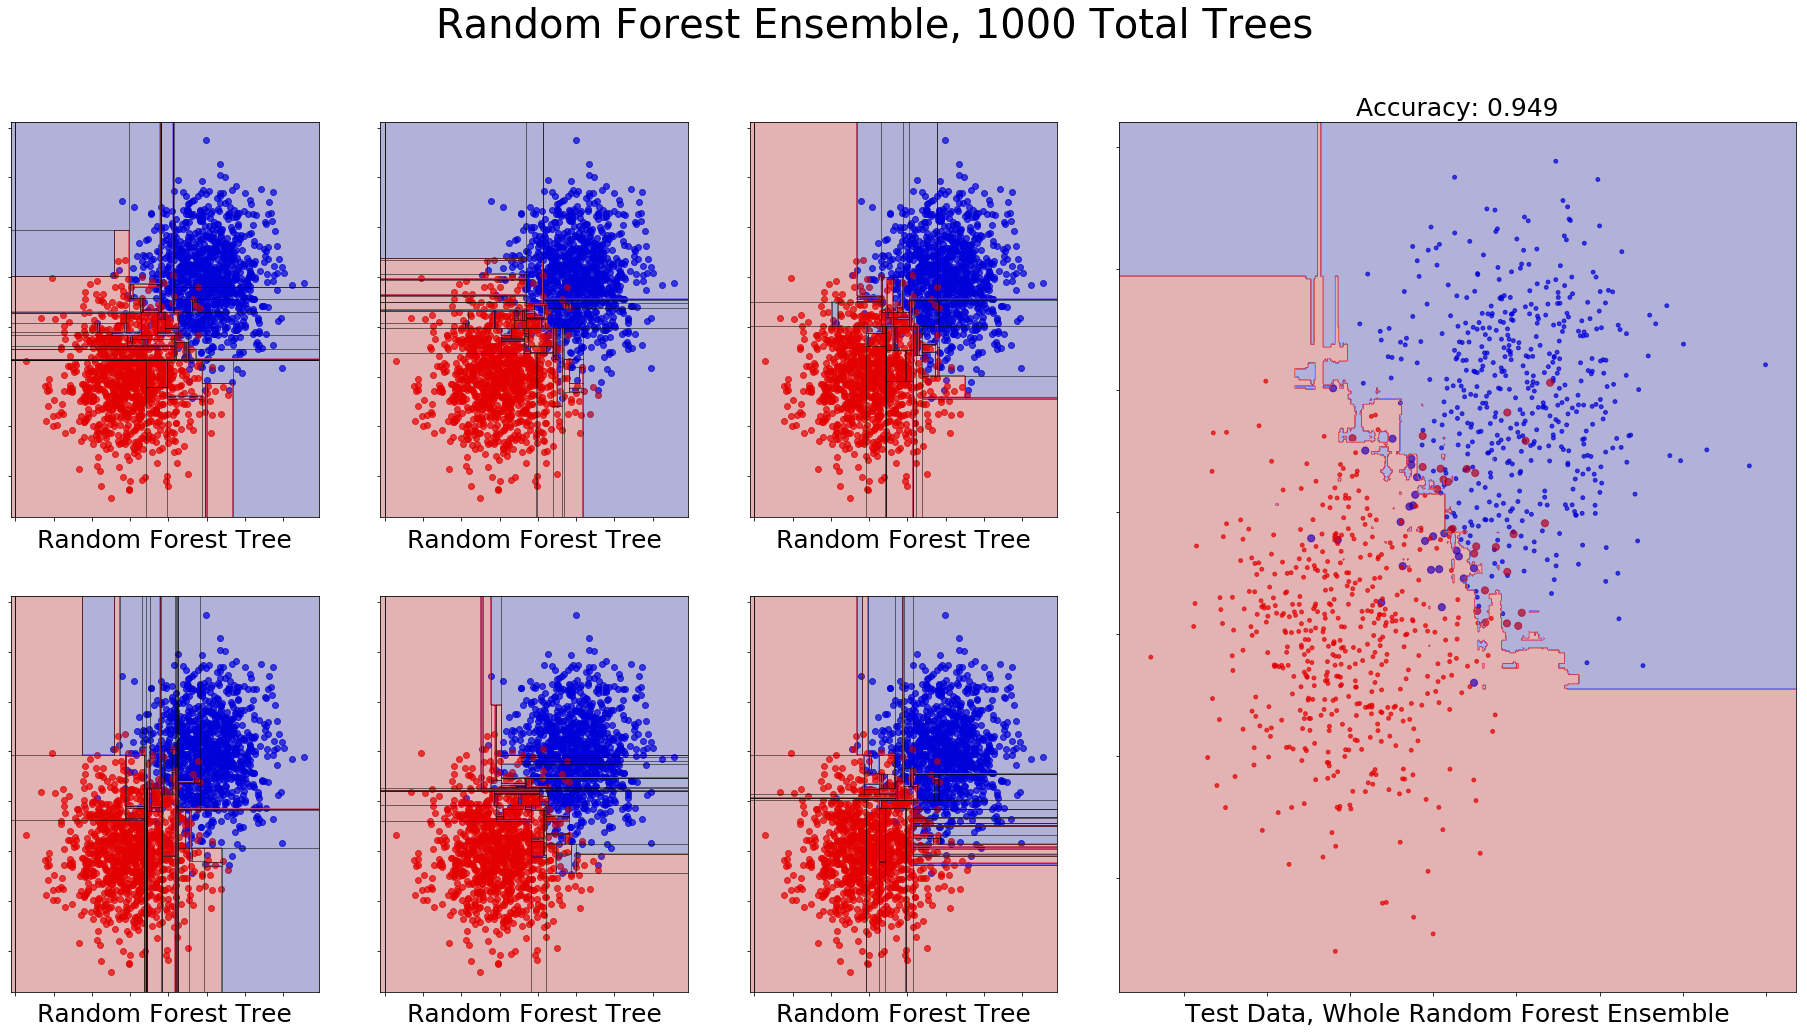

In [9]:
X_large, y_large = make_data(n_points=1000, state=9)
plot_tree_ensemble(X_large, y_large, X_test_large, y_test_large, n_estimators=1000, n_jobs=-1)

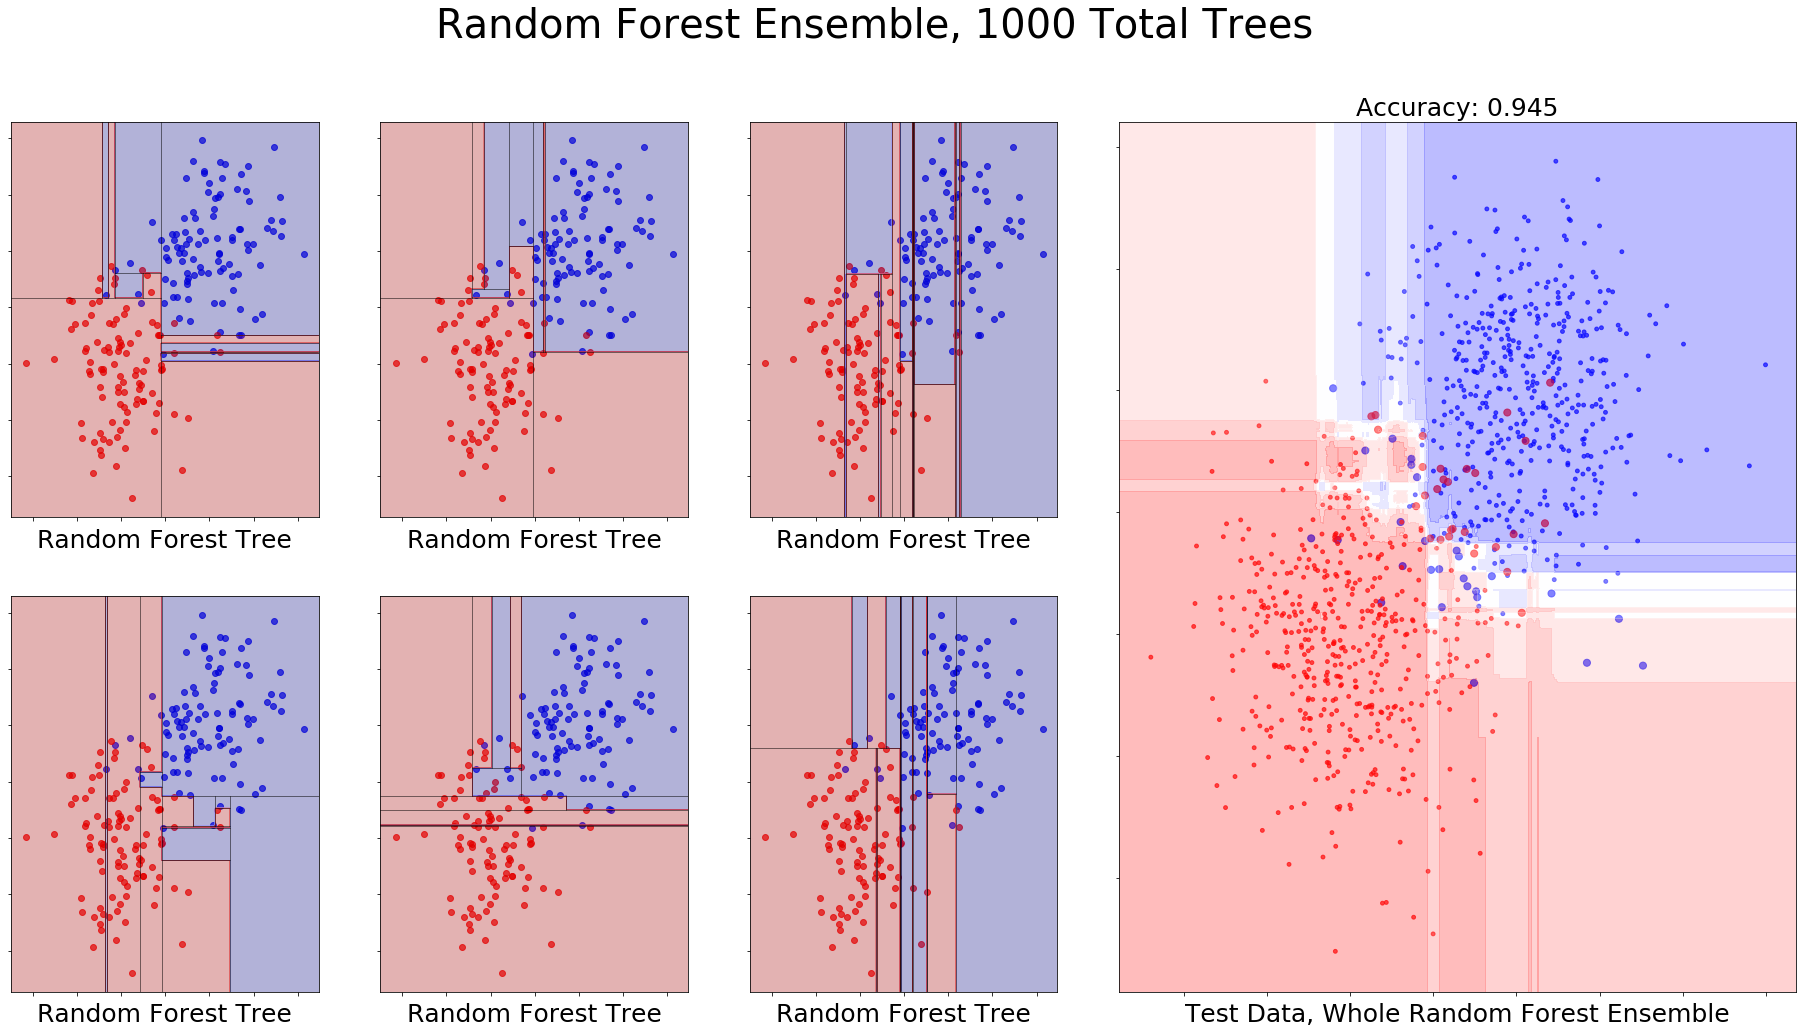

In [10]:
plot_tree_ensemble(X, y, X_test_large, y_test_large, prob_gradient=True,
                   n_estimators=1000, n_jobs=-1)

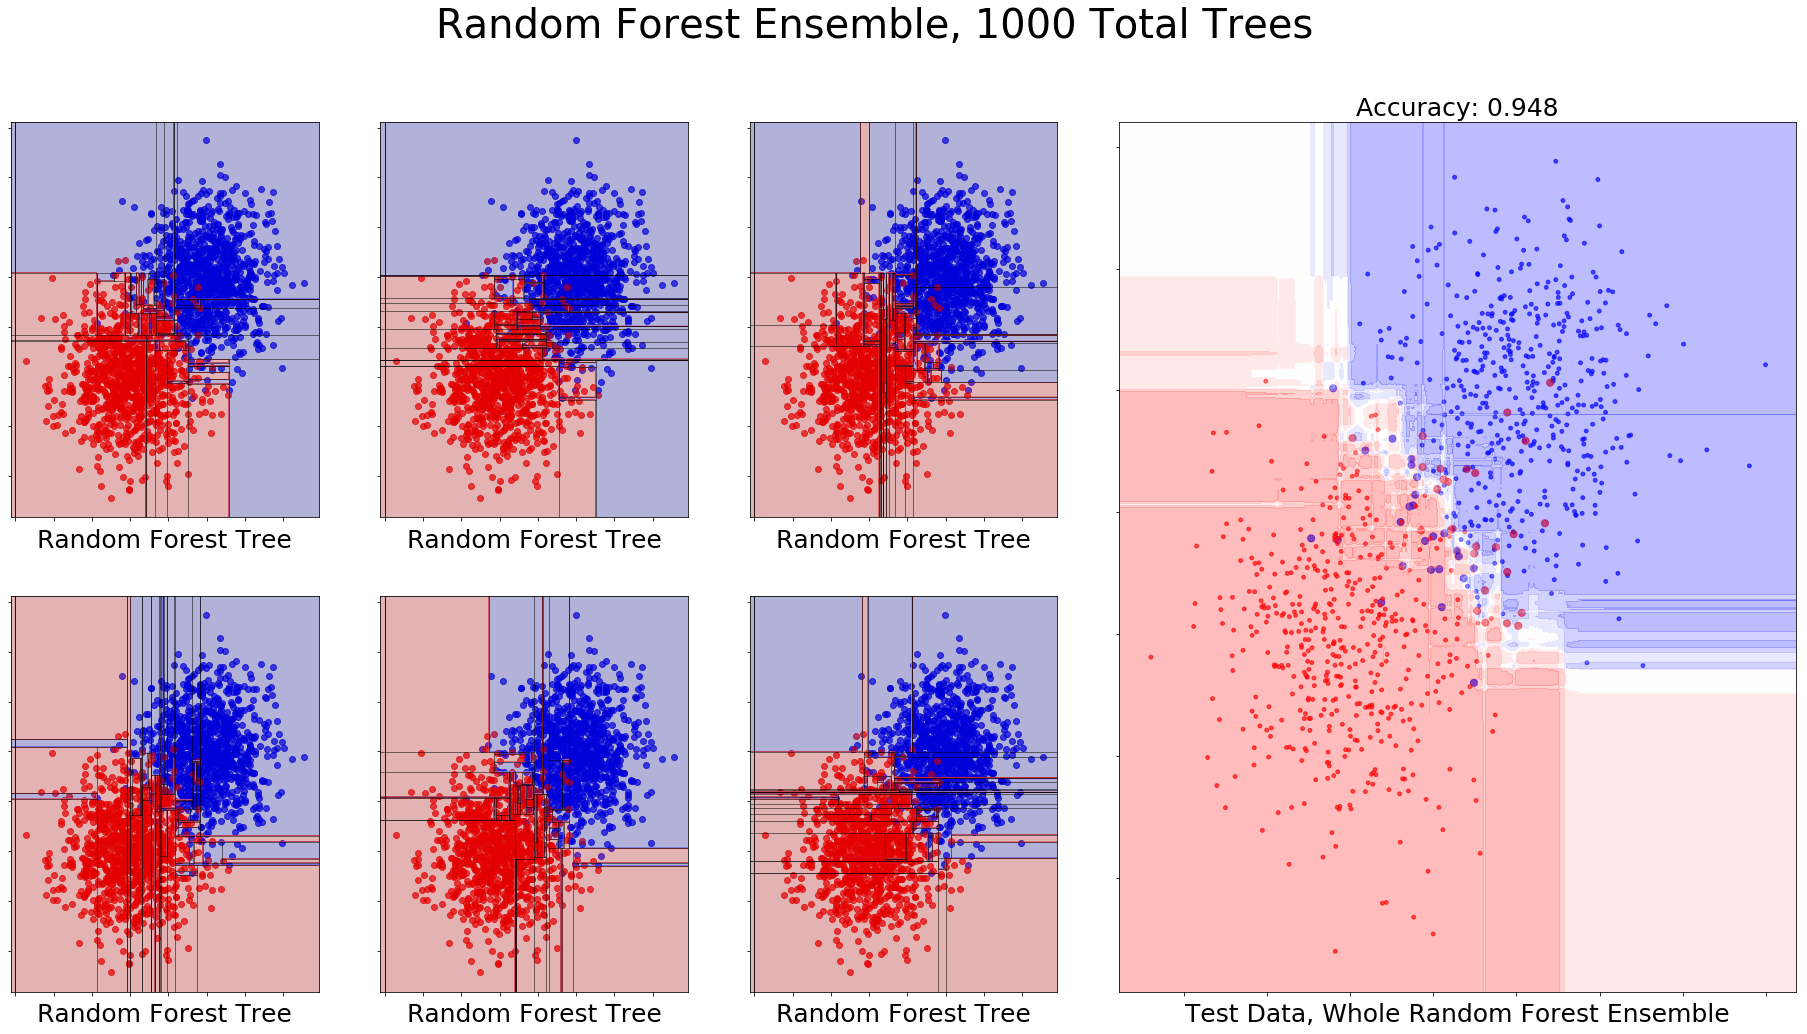

In [11]:
plot_tree_ensemble(X_large, y_large, X_test_large, y_test_large, prob_gradient=True,
                   n_estimators=1000, n_jobs=-1)

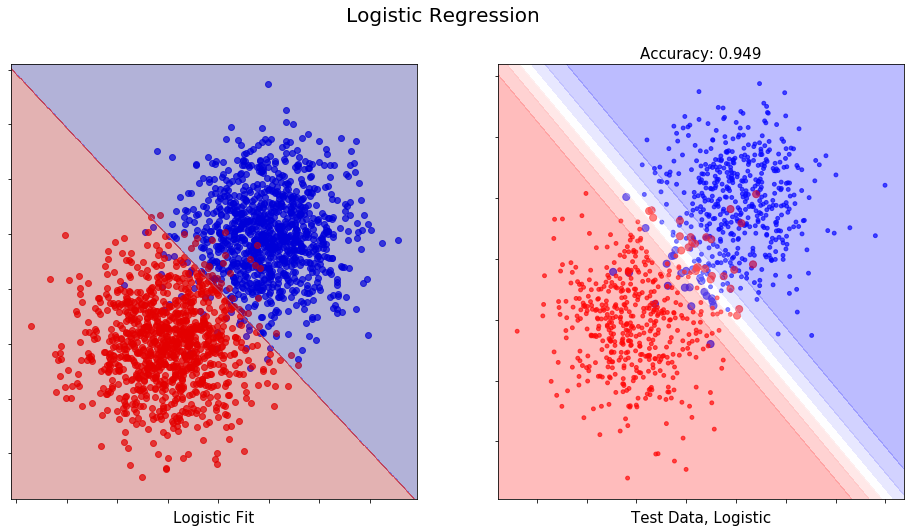

In [12]:
plot_logistic(X_large, y_large, X_test_large, y_test_large, prob_gradient=True)

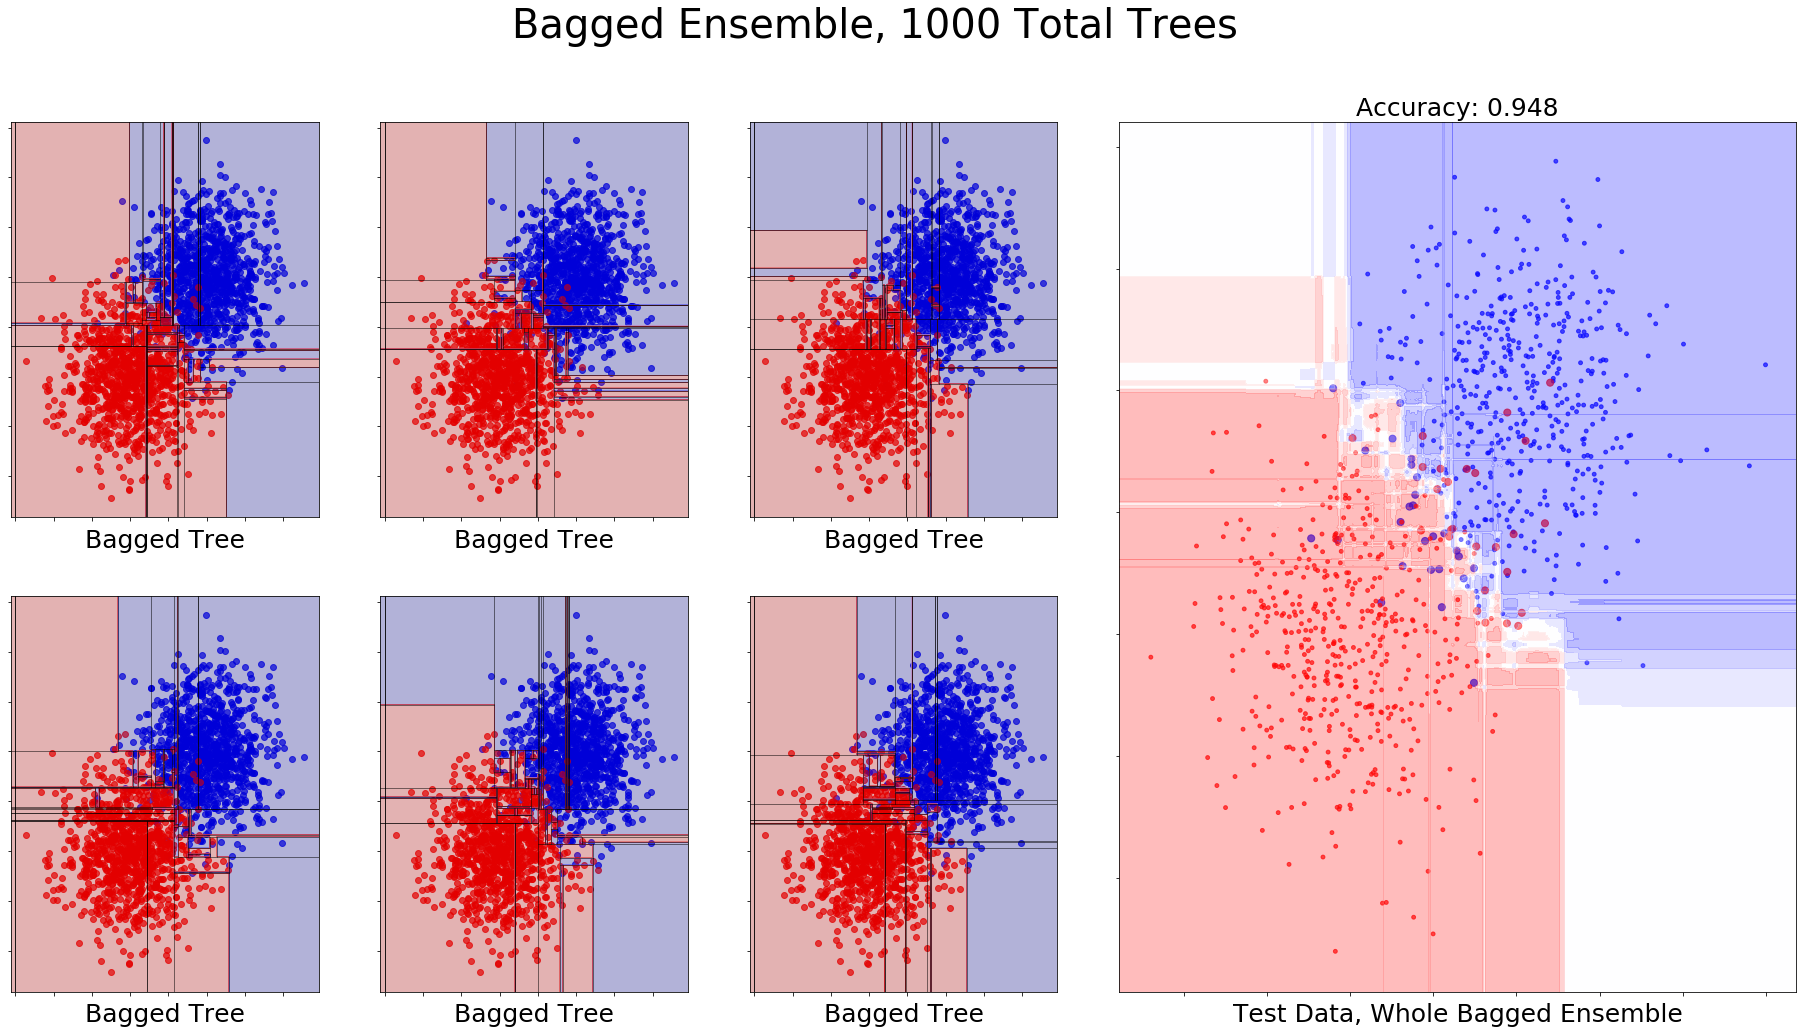

In [13]:
plot_tree_ensemble(X_large, y_large, X_test_large, y_test_large, only_bagging=True,
                   prob_gradient=True, n_estimators=1000, n_jobs=-1)

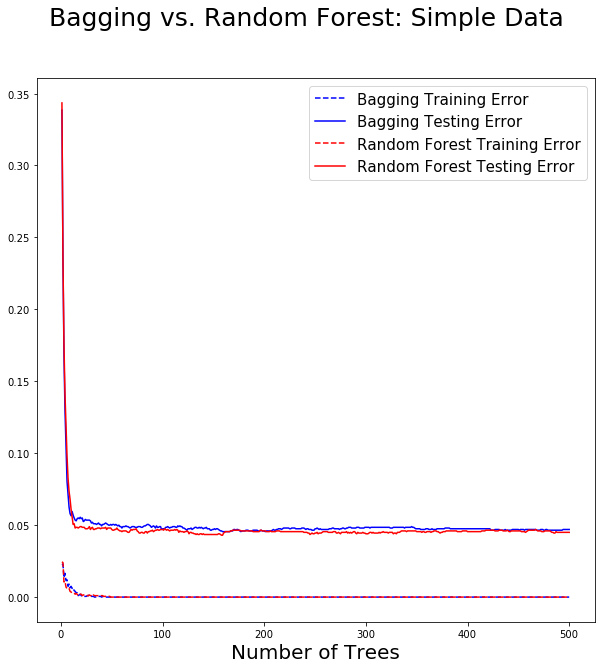

In [ ]:
plot_train_test_bagging_vs_rf(X_large, y_large, 500, 'Bagging vs. Random Forest: Simple Data')

# Objectives

* Intro to Ensembles
* Review Decision Trees
* Bootstrap Aggregating
* Out of Bag (OOB) Error
* Random Forests